In [75]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
df = pd.read_csv('../Data/df.csv')
df

,article_id,perceived_colour_master_id,perceived_colour_master_name,product_type_no,product_type_name,price
0,108775015,5,Black,253,Vest top,0.008142
1,108775044,9,White,253,Vest top,0.008114
2,108775051,9,White,253,Vest top,0.004980
3,110065001,5,Black,306,Bra,0.020219
4,110065002,9,White,306,Bra,0.018205
...,...,...,...,...,...,...
104747,953450001,5,Black,302,Socks,0.016836
104748,953763001,5,Black,253,Vest top,0.021908
104749,956217002,5,Black,265,Dress,0.059152
104750,957375001,5,Black,72,Hair clip,0.028760


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104752 entries, 0 to 104751
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   article_id                    104752 non-null  int64  
 1   perceived_colour_master_id    104752 non-null  int64  
 2   perceived_colour_master_name  104752 non-null  object 
 3   product_type_no               104752 non-null  int64  
 4   product_type_name             104752 non-null  object 
 5   price                         104752 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [79]:
# One-hot encoding for 'Perceived Colour Master Name'
colour= pd.get_dummies(df, columns=['perceived_colour_master_name'])
colour

,article_id,perceived_colour_master_id,product_type_no,product_type_name,price,perceived_colour_master_name_Beige,perceived_colour_master_name_Black,perceived_colour_master_name_Blue,perceived_colour_master_name_Bluish Green,perceived_colour_master_name_Brown,perceived_colour_master_name_Green,perceived_colour_master_name_Grey,perceived_colour_master_name_Khaki green,perceived_colour_master_name_Lilac Purple,perceived_colour_master_name_Metal,perceived_colour_master_name_Mole,perceived_colour_master_name_Orange,perceived_colour_master_name_Pink,perceived_colour_master_name_Red,perceived_colour_master_name_Turquoise,perceived_colour_master_name_White,perceived_colour_master_name_Yellow,perceived_colour_master_name_Yellowish Green
0,108775015,5,253,Vest top,0.008142,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,108775044,9,253,Vest top,0.008114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,108775051,9,253,Vest top,0.004980,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,110065001,5,306,Bra,0.020219,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,110065002,9,306,Bra,0.018205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104747,953450001,5,302,Socks,0.016836,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
104748,953763001,5,253,Vest top,0.021908,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
104749,956217002,5,265,Dress,0.059152,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
104750,957375001,5,72,Hair clip,0.028760,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
# One-hot encoding for 'Product Type Name'
product= pd.get_dummies(df, columns=['product_type_name'])
product

,article_id,perceived_colour_master_id,perceived_colour_master_name,product_type_no,price,product_type_name_Accessories set,product_type_name_Alice band,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blanket,product_type_name_Blazer,product_type_name_Blouse,product_type_name_Bodysuit,product_type_name_Bootie,product_type_name_Boots,product_type_name_Bra,product_type_name_Bra extender,product_type_name_Bracelet,product_type_name_Braces,product_type_name_Bucket hat,product_type_name_Bumbag,product_type_name_Cap,product_type_name_Cap/peaked,product_type_name_Cardigan,product_type_name_Chem. cosmetics,product_type_name_Clothing mist,product_type_name_Coat,product_type_name_Costumes,product_type_name_Cross-body bag,product_type_name_Cushion,product_type_name_Dog Wear,product_type_name_Dog wear,product_type_name_Dress,product_type_name_Dungarees,product_type_name_Earring,product_type_name_Earrings,product_type_name_Eyeglasses,product_type_name_Felt hat,product_type_name_Fine cosmetics,product_type_name_Flat shoe,product_type_name_Flat shoes,product_type_name_Flip flop,product_type_name_Garment Set,product_type_name_Giftbox,product_type_name_Gloves,product_type_name_Hair clip,product_type_name_Hair string,product_type_name_Hair ties,product_type_name_Hair/alice band,product_type_name_Hairband,product_type_name_Hat/beanie,product_type_name_Hat/brim,product_type_name_Headband,product_type_name_Heeled sandals,product_type_name_Heels,product_type_name_Hoodie,product_type_name_Jacket,product_type_name_Jumpsuit/Playsuit,product_type_name_Keychain,product_type_name_Kids Underwear top,product_type_name_Leg warmers,product_type_name_Leggings/Tights,product_type_name_Long John,product_type_name_Marker pen,product_type_name_Mobile case,product_type_name_Moccasins,product_type_name_Necklace,product_type_name_Night gown,product_type_name_Nipple covers,product_type_name_Other accessories,product_type_name_Other shoe,product_type_name_Outdoor Waistcoat,product_type_name_Outdoor overall,product_type_name_Outdoor trousers,product_type_name_Polo shirt,product_type_name_Pre-walkers,product_type_name_Pumps,product_type_name_Pyjama bottom,product_type_name_Pyjama jumpsuit/playsuit,product_type_name_Pyjama set,product_type_name_Ring,product_type_name_Robe,product_type_name_Sandals,product_type_name_Sarong,product_type_name_Scarf,product_type_name_Sewing kit,product_type_name_Shirt,product_type_name_Shorts,product_type_name_Shoulder bag,product_type_name_Side table,product_type_name_Skirt,product_type_name_Sleep Bag,product_type_name_Sleeping sack,product_type_name_Slippers,product_type_name_Sneakers,product_type_name_Socks,product_type_name_Soft Toys,product_type_name_Stain remover spray,product_type_name_Straw hat,product_type_name_Sunglasses,product_type_name_Sweater,product_type_name_Swimsuit,product_type_name_Swimwear bottom,product_type_name_Swimwear set,product_type_name_Swimwear top,product_type_name_T-shirt,product_type_name_Tailored Waistcoat,product_type_name_Tie,product_type_name_Top,product_type_name_Tote bag,product_type_name_Towel,product_type_name_Toy,product_type_name_Trousers,product_type_name_Umbrella,product_type_name_Underdress,product_type_name_Underwear Tights,product_type_name_Underwear body,product_type_name_Underwear bottom,product_type_name_Underwear corset,product_type_name_Underwear set,product_type_name_Unknown,product_type_name_Vest top,product_type_name_Wallet,product_type_name_Washing bag,product_type_name_Watch,product_type_name_Waterbottle,product_type_name_Wedge,product_type_name_Weekend/Gym bag,product_type_name_Wireless earphone case,product_type_name_Wood balls,product_type_name_Zipper head
0,108775015,5,Black,253,0.008142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [81]:
print(product.columns)

Index(['article_id', 'perceived_colour_master_id',
       'perceived_colour_master_name', 'product_type_no', 'price',
       'product_type_name_Accessories set', 'product_type_name_Alice band',
       'product_type_name_Baby Bib', 'product_type_name_Backpack',
       'product_type_name_Bag',
       ...
       'product_type_name_Vest top', 'product_type_name_Wallet',
       'product_type_name_Washing bag', 'product_type_name_Watch',
       'product_type_name_Waterbottle', 'product_type_name_Wedge',
       'product_type_name_Weekend/Gym bag',
       'product_type_name_Wireless earphone case',
       'product_type_name_Wood balls', 'product_type_name_Zipper head'],
      dtype='object', length=136)


In [82]:
merged_df = pd.merge(colour, product, on='article_id', how='inner')
display(merged_df)

,article_id,perceived_colour_master_id_x,product_type_no_x,product_type_name,price_x,perceived_colour_master_name_Beige,perceived_colour_master_name_Black,perceived_colour_master_name_Blue,perceived_colour_master_name_Bluish Green,perceived_colour_master_name_Brown,perceived_colour_master_name_Green,perceived_colour_master_name_Grey,perceived_colour_master_name_Khaki green,perceived_colour_master_name_Lilac Purple,perceived_colour_master_name_Metal,perceived_colour_master_name_Mole,perceived_colour_master_name_Orange,perceived_colour_master_name_Pink,perceived_colour_master_name_Red,perceived_colour_master_name_Turquoise,perceived_colour_master_name_White,perceived_colour_master_name_Yellow,perceived_colour_master_name_Yellowish Green,perceived_colour_master_id_y,perceived_colour_master_name,product_type_no_y,price_y,product_type_name_Accessories set,product_type_name_Alice band,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blanket,product_type_name_Blazer,product_type_name_Blouse,product_type_name_Bodysuit,product_type_name_Bootie,product_type_name_Boots,product_type_name_Bra,product_type_name_Bra extender,product_type_name_Bracelet,product_type_name_Braces,product_type_name_Bucket hat,product_type_name_Bumbag,product_type_name_Cap,product_type_name_Cap/peaked,product_type_name_Cardigan,product_type_name_Chem. cosmetics,product_type_name_Clothing mist,product_type_name_Coat,product_type_name_Costumes,product_type_name_Cross-body bag,product_type_name_Cushion,product_type_name_Dog Wear,product_type_name_Dog wear,product_type_name_Dress,product_type_name_Dungarees,product_type_name_Earring,product_type_name_Earrings,product_type_name_Eyeglasses,product_type_name_Felt hat,product_type_name_Fine cosmetics,product_type_name_Flat shoe,product_type_name_Flat shoes,product_type_name_Flip flop,product_type_name_Garment Set,product_type_name_Giftbox,product_type_name_Gloves,product_type_name_Hair clip,product_type_name_Hair string,product_type_name_Hair ties,product_type_name_Hair/alice band,product_type_name_Hairband,product_type_name_Hat/beanie,product_type_name_Hat/brim,product_type_name_Headband,product_type_name_Heeled sandals,product_type_name_Heels,product_type_name_Hoodie,product_type_name_Jacket,product_type_name_Jumpsuit/Playsuit,product_type_name_Keychain,product_type_name_Kids Underwear top,product_type_name_Leg warmers,product_type_name_Leggings/Tights,product_type_name_Long John,product_type_name_Marker pen,product_type_name_Mobile case,product_type_name_Moccasins,product_type_name_Necklace,product_type_name_Night gown,product_type_name_Nipple covers,product_type_name_Other accessories,product_type_name_Other shoe,product_type_name_Outdoor Waistcoat,product_type_name_Outdoor overall,product_type_name_Outdoor trousers,product_type_name_Polo shirt,product_type_name_Pre-walkers,product_type_name_Pumps,product_type_name_Pyjama bottom,product_type_name_Pyjama jumpsuit/playsuit,product_type_name_Pyjama set,product_type_name_Ring,product_type_name_Robe,product_type_name_Sandals,product_type_name_Sarong,product_type_name_Scarf,product_type_name_Sewing kit,product_type_name_Shirt,product_type_name_Shorts,product_type_name_Shoulder bag,product_type_name_Side table,product_type_name_Skirt,product_type_name_Sleep Bag,product_type_name_Sleeping sack,product_type_name_Slippers,product_type_name_Sneakers,product_type_name_Socks,product_type_name_Soft Toys,product_type_name_Stain remover spray,product_type_name_Straw hat,product_type_name_Sunglasses,product_type_name_Sweater,product_type_name_Swimsuit,product_type_name_Swimwear bottom,product_type_name_Swimwear set,product_type_name_Swimwear top,product_type_name_T-shirt,product_type_name_Tailored Waistcoat,product_type_name_Tie,product_type_name_Top,product_type_name_Tote bag,product_type_name_Towel,product_type_name_Toy,product_type_n

PCA

In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [84]:
# Select the product columns
product_columns = [
    'product_type_name_Accessories set', 'product_type_name_Alice band', 'product_type_name_Baby Bib',
    'product_type_name_Backpack', 'product_type_name_Bag', 'product_type_name_Ballerinas',
    'product_type_name_Beanie', 'product_type_name_Belt', 'product_type_name_Bikini top',
    'product_type_name_Blanket', 'product_type_name_Blazer', 'product_type_name_Blouse',
    'product_type_name_Bodysuit', 'product_type_name_Bootie', 'product_type_name_Boots',
    'product_type_name_Bra', 'product_type_name_Bra extender', 'product_type_name_Bracelet',
    'product_type_name_Braces', 'product_type_name_Bucket hat', 'product_type_name_Bumbag',
    'product_type_name_Cap', 'product_type_name_Cap/peaked', 'product_type_name_Cardigan',
    'product_type_name_Chem. cosmetics', 'product_type_name_Clothing mist', 'product_type_name_Coat',
    'product_type_name_Costumes', 'product_type_name_Cross-body bag', 'product_type_name_Cushion',
    'product_type_name_Dog Wear', 'product_type_name_Dog wear', 'product_type_name_Dress',
    'product_type_name_Dungarees', 'product_type_name_Earring', 'product_type_name_Earrings',
    'product_type_name_Eyeglasses', 'product_type_name_Felt hat', 'product_type_name_Fine cosmetics',
    'product_type_name_Flat shoe', 'product_type_name_Flat shoes', 'product_type_name_Flip flop',
    'product_type_name_Garment Set', 'product_type_name_Giftbox', 'product_type_name_Gloves',
    'product_type_name_Hair clip', 'product_type_name_Hair string', 'product_type_name_Hair ties',
    'product_type_name_Hair/alice band', 'product_type_name_Hairband', 'product_type_name_Hat/beanie',
    'product_type_name_Hat/brim', 'product_type_name_Headband', 'product_type_name_Heeled sandals',
    'product_type_name_Heels', 'product_type_name_Hoodie', 'product_type_name_Jacket',
    'product_type_name_Jumpsuit/Playsuit', 'product_type_name_Keychain', 'product_type_name_Kids Underwear top',
    'product_type_name_Leg warmers', 'product_type_name_Leggings/Tights', 'product_type_name_Long John',
    'product_type_name_Marker pen', 'product_type_name_Mobile case', 'product_type_name_Moccasins',
    'product_type_name_Necklace', 'product_type_name_Night gown', 'product_type_name_Nipple covers',
    'product_type_name_Other accessories', 'product_type_name_Other shoe', 'product_type_name_Outdoor Waistcoat',
    'product_type_name_Outdoor overall', 'product_type_name_Outdoor trousers', 'product_type_name_Polo shirt',
    'product_type_name_Pre-walkers', 'product_type_name_Pumps', 'product_type_name_Pyjama bottom',
    'product_type_name_Pyjama jumpsuit/playsuit', 'product_type_name_Pyjama set', 'product_type_name_Ring',
    'product_type_name_Robe', 'product_type_name_Sandals', 'product_type_name_Sarong', 'product_type_name_Scarf',
    'product_type_name_Sewing kit', 'product_type_name_Shirt', 'product_type_name_Shorts',
    'product_type_name_Shoulder bag', 'product_type_name_Side table', 'product_type_name_Skirt',
    'product_type_name_Sleep Bag', 'product_type_name_Sleeping sack', 'product_type_name_Slippers',
    'product_type_name_Sneakers', 'product_type_name_Socks', 'product_type_name_Soft Toys',
    'product_type_name_Stain remover spray', 'product_type_name_Straw hat', 'product_type_name_Sunglasses',
    'product_type_name_Sweater', 'product_type_name_Swimsuit', 'product_type_name_Swimwear bottom',
    'product_type_name_Swimwear set', 'product_type_name_Swimwear top', 'product_type_name_T-shirt',
    'product_type_name_Tailored Waistcoat', 'product_type_name_Tie', 'product_type_name_Top',
    'product_type_name_Tote bag', 'product_type_name_Towel', 'product_type_name_Toy',
    'product_type_name_Trousers', 'product_type_name_Umbrella', 'product_type_name_Underdress',
    'product_type_name_Underwear Tights', 'product_type_name_Underwear body', 'product_type_name_Underwear bottom',
    'product_type_name_Underwear corset', 'product_type_name_Underwear set', 'product_type_name_Unknown',
    'product_type_name_Vest top', 'product_type_name_Wallet', 'product_type_name_Washing bag',
    'product_type_name_Watch', 'product_type_name_Waterbottle', 'product_type_name_Wedge',
    'product_type_name_Weekend/Gym bag', 'product_type_name_Wireless earphone case', 'product_type_name_Wood balls',
    'product_type_name_Zipper head'
]
# Ensure all columns are present in the DataFrame
x_df = merged_df[product_columns]

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_df)

# Apply PCA
pca = PCA(n_components=0.7)  # You can adjust the number of components or the explained variance ratio
x_pca = pca.fit_transform(x_scaled)

# Create a new DataFrame with PCA result (one column)
df_pca = pd.DataFrame(data=x_pca)

# Display the PCA DataFrame
display(df_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-9.191910e-12,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-3.820836e-12,-0.007655,-0.007906,-1.247051e-11,-0.006271,-1.348708e-10,-0.003168,-0.004918,-0.006028,-7.830200e-11,-0.004456
1,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-9.227633e-12,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-4.100222e-12,-0.007655,-0.007906,-1.251745e-11,-0.006271,-1.347268e-10,-0.003168,-0.004918,-0.006028,-7.830678e-11,-0.004456
2,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-9.721004e-12,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-4.063026e-12,-0.007655,-0.007906,-1.281351e-11,-0.006271,-1.346740e-10,-0.003168,-0.004918,-0.006028,-7.834788e-11,-0.004456
3,-0.102501,-0.166841,0.273999,-0.641352,-0.099366,-0.024894,0.018063,0.508233,-0.683632,-0.607541,0.266275,2.047330,4.693083,4.257560,0.252047,-1.031396,0.337354,0.530305,0.068566,0.055329,-0.088510,-0.250601,0.052159,-0.072380,-0.057368,-0.133309,-0.015164,-0.040491,-0.138448,-0.125080,-0.005784,-0.108462,-0.155105,-0.094219,-0.093319,-0.040858,-0.045645,-0.128736,0.011910,-0.016078,-0.084610,0.003149,-0.014853,-0.031996,-0.016001,-0.051851,-0.095910,0.013829,-0.013749,-0.009905,-0.033455,-0.042136,-0.032839,-0.015129,-0.023697,-0.022589,-0.007936,-0.014577,-0.021281,-0.029793,-0.012209,-0.021199,-0.011676,-0.011651,-0.014369,-0.020513,-0.015832,-0.022853,-0.019228,-1.189782e-11,-0.013879,-0.010612,-0.013937,-0.017370,-0.011596,-0.006516,-0.005653,-0.004772,-0.013589,-0.011058,-4.871431e-12,-0.010493,-0.010835,-1.752279e-11,-0.008591,-1.847355e-10,-0.004339,-0.006734,-0.008252,-1.073475e-10,-0.006099
4,-0.102501,-0.166841,0.273999,-0.641352,-0.099366,-0.024894,0.018

In [85]:
heatmap_df = pd.concat([colour, df_pca], axis=1)
display(heatmap_df)

,article_id,perceived_colour_master_id,product_type_no,product_type_name,price,perceived_colour_master_name_Beige,perceived_colour_master_name_Black,perceived_colour_master_name_Blue,perceived_colour_master_name_Bluish Green,perceived_colour_master_name_Brown,perceived_colour_master_name_Green,perceived_colour_master_name_Grey,perceived_colour_master_name_Khaki green,perceived_colour_master_name_Lilac Purple,perceived_colour_master_name_Metal,perceived_colour_master_name_Mole,perceived_colour_master_name_Orange,perceived_colour_master_name_Pink,perceived_colour_master_name_Red,perceived_colour_master_name_Turquoise,perceived_colour_master_name_White,perceived_colour_master_name_Yellow,perceived_colour_master_name_Yellowish Green,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,108775015,5,253,Vest top,0.008142,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-9.191910e-12,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-3.820836e-12,-0.007655,-0.007906,-1.247051e-11,-0.006271,-1.348708e-10,-0.003168,-0.004918,-0.006028,-7.830200e-11,-0.004456
1,108775044,9,253,Vest top,0.008114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-9.227633e-12,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-4.100222e-12,-0.007655,-0.007906,-1.251745e-11,-0.006271,-1.347268e-10,-0.003168,-0.004918,-0.006028,-7.830678e-11,-0.004456
2,108775051,9,253,Vest top,0.004980,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-9.721004e-12,-0.010072,-0.007704,-0.010127,-0.012630,-0.0084

In [86]:
heatmap_df = heatmap_df.drop(columns=['article_id', 'perceived_colour_master_id', 'product_type_no', 'product_type_name'])

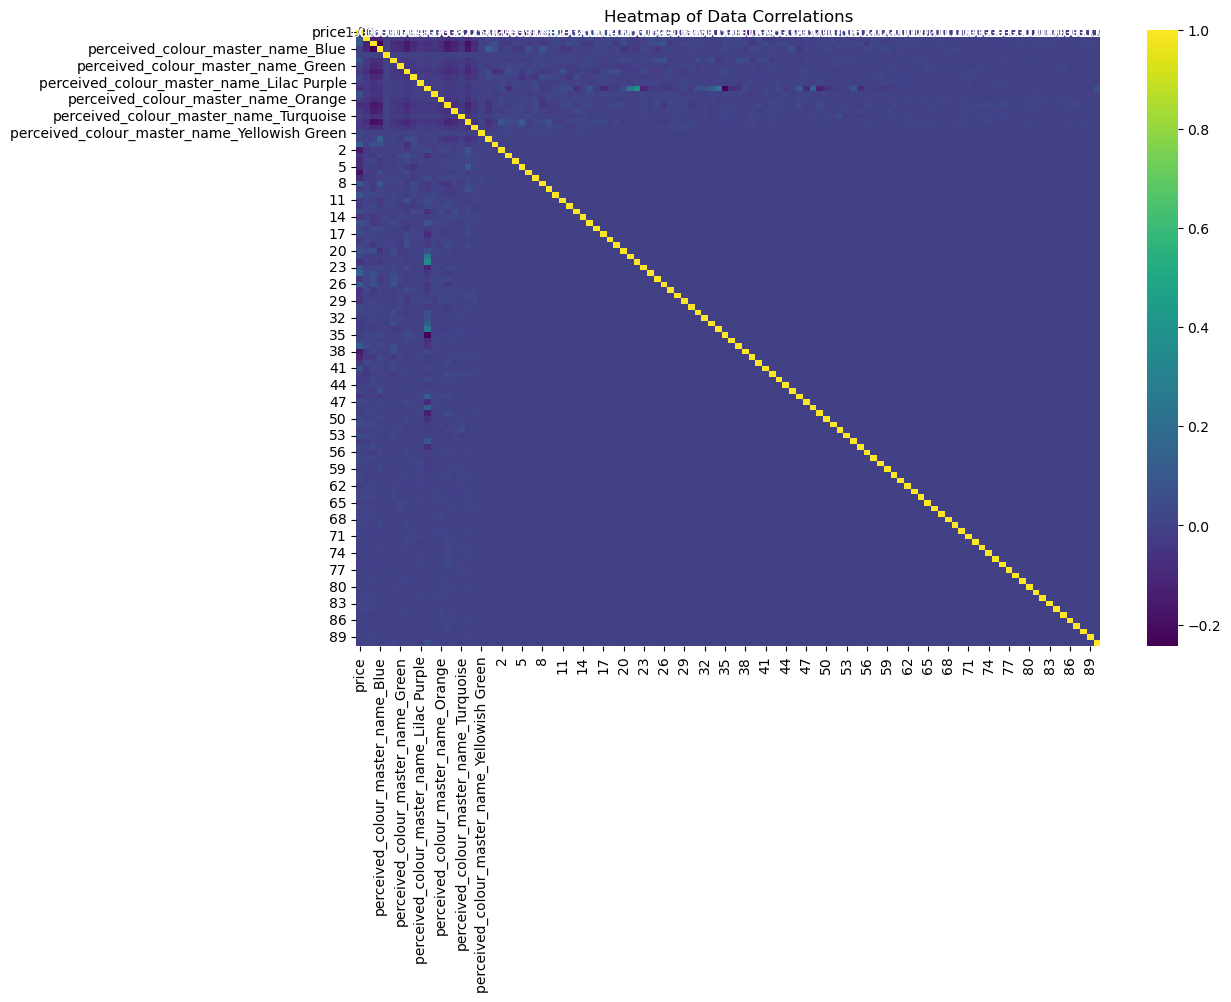

In [87]:
# Create a heatmap for the normalized training data
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Data Correlations')
plt.show()

In [88]:
features = heatmap_df.drop('price', axis=1)
features

,perceived_colour_master_name_Beige,perceived_colour_master_name_Black,perceived_colour_master_name_Blue,perceived_colour_master_name_Bluish Green,perceived_colour_master_name_Brown,perceived_colour_master_name_Green,perceived_colour_master_name_Grey,perceived_colour_master_name_Khaki green,perceived_colour_master_name_Lilac Purple,perceived_colour_master_name_Metal,perceived_colour_master_name_Mole,perceived_colour_master_name_Orange,perceived_colour_master_name_Pink,perceived_colour_master_name_Red,perceived_colour_master_name_Turquoise,perceived_colour_master_name_White,perceived_colour_master_name_Yellow,perceived_colour_master_name_Yellowish Green,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-9.191910e-12,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-3.820836e-12,-0.007655,-0.007906,-1.247051e-11,-0.006271,-1.348708e-10,-0.003168,-0.004918,-0.006028,-7.830200e-11,-0.004456
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-9.227633e-12,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-4.100222e-12,-0.007655,-0.007906,-1.251745e-11,-0.006271,-1.347268e-10,-0.003168,-0.004918,-0.006028,-7.830678e-11,-0.004456
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-0.111927,-0.184556,0.310195,-0.766849,-0.169102,-0.044744,0.032843,1.164947,-2.977754,4.640957,-0.516041,-1.230279,-0.473020,0.630317,0.073692,-0.378922,0.146725,0.252107,0.035698,0.029151,-0.047262,-0.138280,0.029580,-0.041427,-0.033140,-0.078324,-0.009001,-0.024160,-0.084973,-0.078031,-0.003633,-0.069454,-0.101445,-0.062259,-0.062170,-0.027356,-0.030690,-0.087671,0.008153,-0.011018,-0.058350,0.002178,-0.010283,-0.022203,-0.011118,-0.036339,-0.067733,0.009793,-0.009743,-0.007023,-0.023773,-0.030010,-0.023424,-0.010801,-0.016935,-0.016159,-0.005680,-0.010441,-0.015267,-0.021410,-0.008779,-0.015259,-0.008408,-0.008395,-0.010364,-0.014828,-0.011454,-0.016560,-0.013942,-9.721004e-12,-0.010072,-0.007704,-0.010127,-0.012630,-0.008434,-0.004740,-0.004113,-0.003472,-0.009905,-0.008062,-4.063026e-12,-0.007655,-0.007906,-1.281351e-11,-0.006271,-1.346740e-10,-0.003168,-0.004918,-0.006028,-7.834788e-11,-0.004456
3

In [89]:
target = heatmap_df['price']
target

0         0.008142
1         0.008114
2         0.004980
3         0.020219
4         0.018205
            ...   
104747    0.016836
104748    0.021908
104749    0.059152
104750    0.028760
104751    0.028760
Name: price, Length: 104752, dtype: float64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [91]:
# Initialize the scaler
normalizer = MinMaxScaler()

In [ ]:
X_train

transform columns to numeric and then make a for loop, then normalize and then fit 

In [95]:
# Transform the testing data using the same scaler
X_test_norm = normalizer.transform(X_test)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [94]:
# Fit the scaler on the training data and transform the training data
X_train_norm = normalizer.fit_transform(X_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm

,perceived_colour_master_name_Beige,perceived_colour_master_name_Black,perceived_colour_master_name_Blue,perceived_colour_master_name_Bluish Green,perceived_colour_master_name_Brown,perceived_colour_master_name_Green,perceived_colour_master_name_Grey,perceived_colour_master_name_Khaki green,perceived_colour_master_name_Lilac Purple,perceived_colour_master_name_Metal,perceived_colour_master_name_Mole,perceived_colour_master_name_Orange,perceived_colour_master_name_Pink,perceived_colour_master_name_Red,perceived_colour_master_name_Turquoise,perceived_colour_master_name_White,perceived_colour_master_name_Yellow,perceived_colour_master_name_Yellowish Green,PC1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291764
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292447
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299056
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.303226
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.306171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.282170
83797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.296163
83798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.295386
83799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.290073


In [ ]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm

,perceived_colour_master_name_Beige,perceived_colour_master_name_Black,perceived_colour_master_name_Blue,perceived_colour_master_name_Bluish Green,perceived_colour_master_name_Brown,perceived_colour_master_name_Green,perceived_colour_master_name_Grey,perceived_colour_master_name_Khaki green,perceived_colour_master_name_Lilac Purple,perceived_colour_master_name_Metal,perceived_colour_master_name_Mole,perceived_colour_master_name_Orange,perceived_colour_master_name_Pink,perceived_colour_master_name_Red,perceived_colour_master_name_Turquoise,perceived_colour_master_name_White,perceived_colour_master_name_Yellow,perceived_colour_master_name_Yellowish Green,PC1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.306171
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.294495
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.292447
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295067
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20946,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306171
20947,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290633
20948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.299324
20949,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294495


In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_test_norm, y_test)

KNeighborsRegressor()

In [55]:
y_pred = knn.predict(X_test)

NameError: name 'knn' is not defined

In [139]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_standardized = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(r2_standardized) 

Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
0.18249536485965745


The metrics you provided—Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (r²) score—are commonly used to evaluate the performance of regression models, including the K-Nearest Neighbors (KNN) regressor. Here is an explanation of what each of these metrics means:

1. **Mean Absolute Error (MAE): 0.01**
   - **Definition**: The MAE is the average of the absolute differences between the predicted values and the actual values. It measures the average magnitude of the errors in a set of predictions, without considering their direction.
   - **Interpretation**: An MAE of 0.01 indicates that, on average, the model's predictions are off by 0.01 units from the actual values. This is generally considered a low error, suggesting that the model is performing well in terms of the average absolute error.

2. **Mean Squared Error (MSE): 0.00**
   - **Definition**: The MSE is the average of the squared differences between the predicted values and the actual values. It measures the average squared magnitude of the errors, giving more weight to larger errors.
   - **Interpretation**: An MSE of 0.00 indicates that the model's predictions are very close to the actual values, with the average squared error being extremely low. However, note that the MSE is highly sensitive to outliers.

3. **R-squared (r²) score: 0.18249536485965745**
   - **Definition**: The R-squared score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean.
   - **Interpretation**: An R-squared score of 0.182 indicates that approximately 18.25% of the variance in the dependent variable is explained by the model. This is a relatively low score, suggesting that the model does not explain much of the variability in the data. The remaining 81.75% of the variance is due to factors not captured by the model.

**Summary**:
- The **MAE** and **MSE** are both very low, indicating that the model's predictions are close to the actual values in terms of average error and squared error.
- The **R-squared score** is quite low, indicating that the model is not very effective at explaining the variance in the dependent variable. This could suggest that the KNN model might not be the best fit for the data, or there could be other factors or noise affecting the prediction.

When interpreting these metrics, it's essential to consider the context of the specific problem and dataset. A low R-squared score might be acceptable in some domains or datasets with high inherent variability. It may also indicate that further tuning, feature engineering, or trying different algorithms might improve the model's performance.

In [ ]:
# THESE LINES OF CODE ARE REALLY IMPORTANT TO RE-USE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats

# Assuming X and y are already defined from the previous steps

# Function to remove outliers
def remove_outliers(df, columns, z_threshold=3):
  columns = [col for col in columns if col in df.columns]
  return df[(np.abs(stats.zscore(df[columns])) < z_threshold).all(axis=1)]

# Define different feature sets
all_features = X.columns.tolist()
numeric_features = [col for col in ['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'FamilySize', 'AgeGroup'] if col in X.columns]
categorical_features = [col for col in ['Pclass', 'Sex_female', 'Sex_male', 'Title_L', 'Title_Rare', 'Title_Unknown'] if col in X.columns]

feature_sets = {
  'All Features': all_features,
  'Numeric Only': numeric_features,
  'Categorical Only': categorical_features,
  'No Family Size': [col for col in all_features if col not in ['FamilySize', 'IsAlone']],
  'No Age Group': [col for col in all_features if col != 'AgeGroup']
}

# Define models
models = {
  'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
  'Decision Tree': DecisionTreeClassifier(random_state=42),
  'Random Forest': RandomForestClassifier(random_state=42),
  'SVM': SVC(random_state=42),
  'KNN': KNeighborsClassifier()
}

# Prepare results DataFrame
results = []

# Iterate through different scenarios
for outliers in ['With Outliers', 'Without Outliers']:
  for scaling in ['No Scaling', 'Standardization', 'Normalization']:
      for feature_set_name, features in feature_sets.items():
          # Prepare data
          X_subset = X[features]
          
          if outliers == 'Without Outliers':
              X_subset = remove_outliers(X_subset, numeric_features)
              y_subset = y[X_subset.index]
          else:
              y_subset = y
          
          X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
          
          if scaling == 'Standardization':
              scaler = StandardScaler()
              X_train_scaled = scaler.fit_transform(X_train)
              X_test_scaled = scaler.transform(X_test)
          elif scaling == 'Normalization':
              scaler = MinMaxScaler()
              X_train_scaled = scaler.fit_transform(X_train)
              X_test_scaled = scaler.transform(X_test)
          else:
              X_train_scaled = X_train
              X_test_scaled = X_test
          
          # Train and evaluate models
          for model_name, model in models.items():
              model.fit(X_train_scaled, y_train)
              y_pred = model.predict(X_test_scaled)
              accuracy = accuracy_score(y_test, y_pred)
              
              results.append({
                  'Model': model_name,
                  'Outliers': outliers,
                  'Scaling': scaling,
                  'Feature Set': feature_set_name,
                  'Accuracy': accuracy
              })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print summary
print(results_df)

# Find best performing model
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest performing model:")
print(best_model)

# Optional: Save results to CSV
results_df.to_csv('model_comparison_results.csv', index=False)